In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
mat = scipy.io.loadmat('data_hw5_3.mat')['R']

data = pd.DataFrame(mat, columns=None)

### Problem 7A: Visualize Data

Text(0.5, 1.0, 'X1 vs X2, colors indicate class')

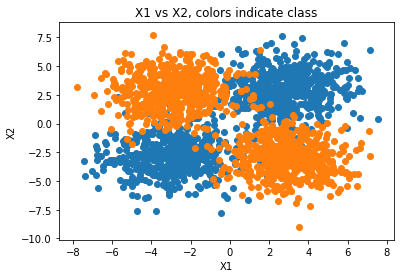

In [3]:
# Split data into classes and visualize
class1 = data[data[2]==1]
class2 = data[data[2]==2]

plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X1 vs X2, colors indicate class')

### Problem 7B: Logistic Regression

(1600, 2) (1600, 1)
(400, 2) (400, 1)
Accuracy:  0.485


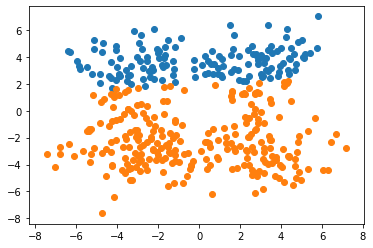

In [14]:
# Split data into train x and y
train_X , test_X, train_Y, test_Y = train_test_split(data[[0, 1]], data[[2]], test_size=0.2)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(train_X, np.ravel(train_Y))
logistic_preds = logistic_model.predict(test_X)
print("Accuracy: ", accuracy_score(test_Y, logistic_preds))

# Plot test data with color based on which class it was placed in
test_X['predicted'] = logistic_preds
class1 = test_X[test_X['predicted'] == 1.0]
class2 = test_X[test_X['predicted'] == 2.0]
plt.scatter(class1[0], class1[1])
plt.scatter(class2[0], class2[1])



### Problem 7C: Discussion
The accuracy score for logistic regression here is very poor, no better than guessing. This is because the data are not linearly separable, and therefore logistic regression cannot find a decision boundary. Each time the above cell is run, the logistic regression model finds a completely different decision boundary, which is evidence that logistic regression is not the best approach to use here. It's possible that using higher-order terms of X1 and X2 as additional features might help improve the prediction capability, because higher-order terms might make the data in each class linearly separable, as in the example from class. However, the most obvious way to improve the classification result is to simply use a different type of classifier more suited to non-linearly separable data. A very simple decision tree model would likely improve accuracy significantly because this type of model is more suited to these data.

### Problem  7D: Neural Network

In [111]:
# Split data into train x and y
train_X , test_X, train_Y, test_Y = train_test_split(data[[0, 1]], data[[2]], test_size=0.2)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

# Build Keras model
n_cols = train_X.shape[1]

model = Sequential()
# Input layer
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
# 3 hidden layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# Output layer, predicts continuous output close to 1 or 2 given input data
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_Y, validation_split=0.2, epochs=30)

# Make predictions and round them so we can compare to actual values
preds = model.predict(test_X)
preds = [round(p[0]) for p in preds]

print("Accuracy: ", accuracy_score(test_Y, preds))


Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 0s 94us/step - loss: 3.8966 - val_loss: 2.5619
Epoch 2/30
1280/1280 [==============================] - 0s 23us/step - loss: 1.5773 - val_loss: 0.6972
Epoch 3/30
1280/1280 [==============================] - 0s 26us/step - loss: 0.3341 - val_loss: 0.1656
Epoch 4/30
1280/1280 [==============================] - 0s 22us/step - loss: 0.1650 - val_loss: 0.1353
Epoch 5/30
1280/1280 [==============================] - 0s 23us/step - loss: 0.1450 - val_loss: 0.1200
Epoch 6/30
1280/1280 [==============================] - 0s 21us/step - loss: 0.1298 - val_loss: 0.1082
Epoch 7/30
1280/1280 [==============================] - 0s 26us/step - loss: 0.1174 - val_loss: 0.0971
Epoch 8/30
1280/1280 [==============================] - 0s 21us/step - loss: 0.1067 - val_loss: 0.0891
Epoch 9/30
1280/1280 [==============================] - 0s 24us/step - loss: 0.0969 - val_loss: 0.0796
Epoch 10/30
1280/1280 [===

### Discussion
The 3-layer neural network above achieves very good accuracy with the test data of 94% using mean squared error as the loss function. 